In [4]:
import re
import csv
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
#import nltk
from collections import Counter 
import matplotlib.pyplot as plt


# On génère les série temporelle

In [22]:
def generate_first_type_time_series(nb_series, size):
    return np.array([[np.sin(np.divide(2*np.pi*i*t, 64)) for t in range(1,size+1)] for i in range(1,nb_series+1)])

In [55]:
def generate_second_type_time_series(nb_series, size):
    fst_type = generate_first_type_time_series(nb_series, size)
    result = []
    frac = 1/(nb_series-1)
    for i in range(1,nb_series+1):
        loc = []
        for t in range(1,size+1):
            fst = fst_type[i-1,t-1]
            snd=frac*np.sum(np.delete(fst_type[:,t-1], i-1, axis=0))
            loc.append(fst+snd)
        result.append(loc)
    return np.array(result)

In [56]:
fst_series = generate_first_type_time_series(6,64)
snd_series = generate_second_type_time_series(6,64)

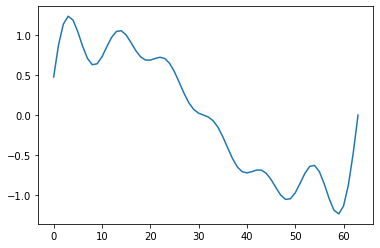

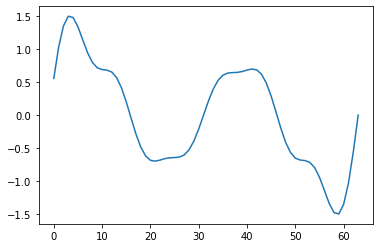

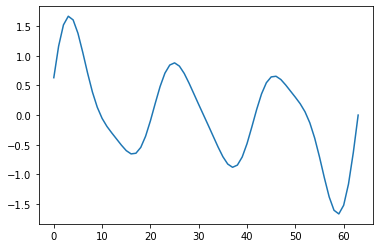

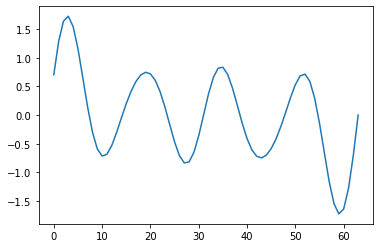

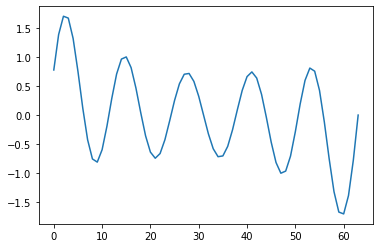

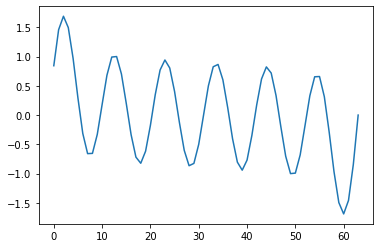

In [57]:
for serie in snd_series:
    plt.plot(serie)
    plt.show()